In [ ]:
!pip install pandas
!pip install openpyxl
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install mlxtend

El algoritmo Apriori es comúnmente utilizado en minería de datos para descubrir patrones de asociación en conjuntos de datos. En nuestro contexto de tickets de compra, este algoritmo nos ayuda a identificar combinaciones de productos que tienden a ser comprados juntos con cierta frecuencia.

**¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos**

Cuando hablamos de frecuencia nos referimos al número total de veces que un conjunto de elementos aparece en el conjunto de datos completo. Es una medida absoluta en la que no se considera la proporción relativa en la que aparecen los conjuntos de elementos en relación con el tamaño total del conjunto de datos. Y cuando hablamos de soporte hablamos de la medida de la frecuencia relativa con la que aparece un conjunto de elementos en el conjunto de datos en comparación con el tamaño total del conjunto de datos. Se expresa como un porcentaje y se utiliza para identificar los conjuntos de elementos que aparecen juntos con una frecuencia igual o superior al soporte mínimo establecido.

Por esto, centrándonos en la primera configuración, cuando utilizamos el soporte mínimo, nos centramos en la frecuencia relativa que se da en el conjunto de elementos. Con esto buscamos aquellos conjuntos que aparecen con una frecuencia igual o superior al soporte mínimo establecido, es decir, si tenemos un soporte mínimo del 0.03, identificamos aquellos conjuntos de elementos que aparecen juntos en al menos el 3% de los recibos de compra. Esta métrica nos ayuda a encontrar los conjuntos que tienen una relación fuerte entre ellos.

Por otro lado, al emplear la frecuencia absoluta, nos enfocamos en la cantidad total de veces que aparece un conjunto de elementos en todos los recibos de compra que tenemos. Aquí no consideramos la proporción relativa en la que aparecen, sino simplemente cuántas veces ocurren. Por ejemplo, si tenemos una frecuencia mínima de 225 (redondeando de 225.03), estamos buscando aquellos conjuntos que aparecen juntos al menos 225 veces en el conjunto de datos completo.

Al comparar las dos perspectivas, notamos que el uso de soporte nos permite encontrar conjuntos más pequeños pero más significativos en términos de relación entre los elementos, mientras que la frecuencia nos brinda una visión más general y directa de la popularidad absoluta de los conjuntos de elementos en el conjunto de datos.

Por lo tanto, al combinar ambas métricas en nuestro análisis, podemos obtener una comprensión más completa de las relaciones entre los elementos en los recibos de compra. Esto nos ayuda a identificar tanto las asociaciones más fuertes en términos relativos como aquellas que son simplemente populares en términos absolutos, lo cual nos da una visión más amplia del comportamiento de compra de los clientes.

**¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?**

Según las configuraciones utilizadas y el tipo de puntuación, algunas reglas desaparecen debido a que no alcanzan el umbral establecido de soporte mínimo y/o confianza.

En la primera configuración, donde se emplea un soporte mínimo del 0.03, observamos que algunas reglas no cumplen con la confianza mínima del 0.2, como por ejemplo, {'chocolate'} -> {'eggs'} y {'french fries'} -> {'eggs'}. Estas reglas desaparecen debido a que no superan el umbral de confianza establecido.

En la segunda configuración, con un soporte mínimo de 0.04, vemos que las reglas que desaparecen son las mismas que en la primera configuración, ya que el umbral de confianza sigue siendo el mismo.

Finalmente, en la tercera configuración, con un soporte mínimo de 0.05, desaparecen algunas reglas que sí cumplían con el umbral de confianza, como {'milk'} -> {'mineral water'}, {'frozen vegetables'} -> {'mineral water'}, {'green tea'} -> {'mineral water'}, {'ground beef'} -> {'mineral water'}, y {'pancakes'} -> {'mineral water'}. Esto sucede porque el umbral de soporte mínimo es más alto, lo que implica que se necesitan más transacciones que contengan esas combinaciones de productos para que las reglas se consideren válidas.

En resumen, el tipo de reglas que desaparecen varía según la configuración utilizada y el tipo de puntuación debido a los diferentes umbrales de soporte mínimo y confianza establecidos, lo que afecta la cantidad de transacciones necesarias para que una regla sea considerada significativa.

##**PRIMERA CONFIGURACION**

a) Utilizando soporte mínimo
*   SOPORTE MÍNIMO: 0.03
*   CONFIANZA: 0.2

b) Utilizando frecuencia soporte
*   FRECUENCIA SOPORTE: 225.003 = 0.03*7501
*   CONFIANZA: 0.2

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# Cargar los datos
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', sep=';', header=None)

# Convertir la columna en una lista de listas
transactions = data[0].str.split(',')

# Inicializar y ajustar el codificador de transacciones
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)

# Convertir los datos codificados en un DataFrame
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Calcular itemsets frecuentes
itemsets_frecuentes = apriori(df_encoded, min_support=0.03, use_colnames=True)

# Filtrar itemsets frecuentes por longitud
itemsets_frecuentes = itemsets_frecuentes[itemsets_frecuentes['itemsets'].apply(len) > 0]

# Imprimir itemsets frecuentes
print("\nItemsets Frecuentes:\n", itemsets_frecuentes)



Itemsets Frecuentes:
      support                            itemsets
0   0.033329                           (avocado)
1   0.033729                          (brownies)
2   0.087188                           (burgers)
3   0.030129                            (butter)
4   0.081056                              (cake)
5   0.046794                         (champagne)
6   0.059992                           (chicken)
7   0.163845                         (chocolate)
8   0.080389                           (cookies)
9   0.051060                       (cooking oil)
10  0.031862                    (cottage cheese)
11  0.179709                              (eggs)
12  0.079323                          (escalope)
13  0.170911                      (french fries)
14  0.043061                       (fresh bread)
15  0.063325                   (frozen smoothie)
16  0.095321                 (frozen vegetables)
17  0.052393                     (grated cheese)
18  0.132116                         (green te

In [ ]:
# Supongamos que ya tenemos itemsets_frecuentes generado mediante apriori

# Calcular reglas de asociación
reglas_asociacion = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.2)

# Obtener el tamaño del último item
tamano_ultimo_item = max(itemsets_frecuentes['itemsets'].apply(len))

# Filtrar reglas de asociación por tamaño del último item
reglas_filtradas = reglas_asociacion[(reglas_asociacion['antecedents'].apply(len) + reglas_asociacion['consequents'].apply(len)) == tamano_ultimo_item]

# Imprimir las reglas de asociación filtradas por tamaño
if not reglas_filtradas.empty:
    print(f"\nReglas de Asociación:")
    for index, row in reglas_filtradas.iterrows():
        antecedente = set(row['antecedents'])
        consecuente = set(row['consequents'])
        confianza = row['confidence']
        print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")
else:
    print(f"\nNo se encontraron reglas de asociación")
print("\n\n")




Reglas de Asociación:
{'chocolate'} -> {'eggs'} : Confianza = 0.20260374288039054
{'french fries'} -> {'chocolate'} : Confianza = 0.20124804992199688
{'chocolate'} -> {'french fries'} : Confianza = 0.209926769731489
{'milk'} -> {'chocolate'} : Confianza = 0.2479423868312757
{'mineral water'} -> {'chocolate'} : Confianza = 0.220917225950783
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099
{'spaghetti'} -> {'chocolate'} : Confianza = 0.22511485451761104
{'chocolate'} -> {'spaghetti'} : Confianza = 0.23921887713588283
{'french fries'} -> {'eggs'} : Confianza = 0.21294851794071765
{'eggs'} -> {'french fries'} : Confianza = 0.20252225519287834
{'milk'} -> {'eggs'} : Confianza = 0.23765432098765432
{'mineral water'} -> {'eggs'} : Confianza = 0.21364653243847875
{'eggs'} -> {'mineral water'} : Confianza = 0.28338278931750743
{'eggs'} -> {'spaghetti'} : Confianza = 0.2032640949554896
{'spaghetti'} -> {'eggs'} : Confianza = 0.20980091883614088
{'frozen vegetables'} -> {'mine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


###b) Utilizando frecuencia soporte

In [ ]:
# Calcular la frecuencia de cada item en las transacciones
frecuencias_items = pd.Series(transactions.explode()).value_counts()

# Filtrar items con frecuencia mayor anuestra frecuecnia soporte:
frecuencia_soporte=225.003
items_frecuentes = frecuencias_items[frecuencias_items >= frecuencia_soporte].index.tolist()

# Filtrar las transacciones para incluir solo items frecuentes
transactions_frecuentes = transactions.apply(lambda x: list(set(x) & set(items_frecuentes)))

# Inicializar y ajustar el codificador de transacciones
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions_frecuentes)

# Convertir los datos codificados en un DataFrame
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Calcular itemsets frecuentes basados en frecuencias
itemsets_frecuentes = apriori(df_encoded, min_support=frecuencia_soporte/len(transactions_frecuentes), use_colnames=True)

# Filtrar itemsets frecuentes por longitud
itemsets_frecuentes = itemsets_frecuentes[itemsets_frecuentes['itemsets'].apply(len) > 0]

# Imprimir itemsets frecuentes con frecuencia en lugar de soporte
itemsets_frecuentes['frecuencia'] = itemsets_frecuentes['support'] * len(transactions_frecuentes)
print("\nItemsets Frecuentes (basados en frecuencias):\n", itemsets_frecuentes[['frecuencia', 'itemsets']])




Itemsets Frecuentes (basados en frecuencias):
     frecuencia                            itemsets
0        250.0                           (avocado)
1        253.0                          (brownies)
2        654.0                           (burgers)
3        226.0                            (butter)
4        608.0                              (cake)
5        351.0                         (champagne)
6        450.0                           (chicken)
7       1229.0                         (chocolate)
8        603.0                           (cookies)
9        383.0                       (cooking oil)
10       239.0                    (cottage cheese)
11      1348.0                              (eggs)
12       595.0                          (escalope)
13      1282.0                      (french fries)
14       323.0                       (fresh bread)
15       475.0                   (frozen smoothie)
16       715.0                 (frozen vegetables)
17       393.0                    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcular reglas de asociación con min_confidence 0.7 basado en frecuencias
reglas_asociacion = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.2)

# Obtener el tamaño del último item
tamano_ultimo_item = max(itemsets_frecuentes['itemsets'].apply(len))

# Filtrar reglas de asociación por tamaño del último item
reglas_filtradas = reglas_asociacion[(reglas_asociacion['antecedents'].apply(len) + reglas_asociacion['consequents'].apply(len)) == tamano_ultimo_item]

# Imprimir las reglas de asociación filtradas por tamaño
if not reglas_filtradas.empty:
    print(f"\nReglas de Asociación de Tamaño (basadas en frecuencias):")
    for index, row in reglas_filtradas.iterrows():
        antecedente = set(row['antecedents'])
        consecuente = set(row['consequents'])
        confianza = row['confidence']
        print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")
else:
    print(f"\nNo se encontraron reglas de asociación basadas en frecuencias.")

print("\n\n")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Reglas de Asociación de Tamaño (basadas en frecuencias):
{'chocolate'} -> {'eggs'} : Confianza = 0.20260374288039054
{'french fries'} -> {'chocolate'} : Confianza = 0.20124804992199688
{'chocolate'} -> {'french fries'} : Confianza = 0.209926769731489
{'milk'} -> {'chocolate'} : Confianza = 0.2479423868312757
{'mineral water'} -> {'chocolate'} : Confianza = 0.220917225950783
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099
{'spaghetti'} -> {'chocolate'} : Confianza = 0.22511485451761104
{'chocolate'} -> {'spaghetti'} : Confianza = 0.23921887713588283
{'french fries'} -> {'eggs'} : Confianza = 0.21294851794071765
{'eggs'} -> {'french fries'} : Confianza = 0.20252225519287834
{'milk'} -> {'eggs'} : Confianza = 0.23765432098765432
{'mineral water'} -> {'eggs'} : Confianza = 0.21364653243847875
{'eggs'} -> {'mineral water'} : Confianza = 0.28338278931750743
{'eggs'} -> {'spaghetti'} : Confianza = 0.2032640949554896
{'spaghetti'} -> {'eggs'} : Confianza = 0.20980091883614

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


###Representación Gráfica

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


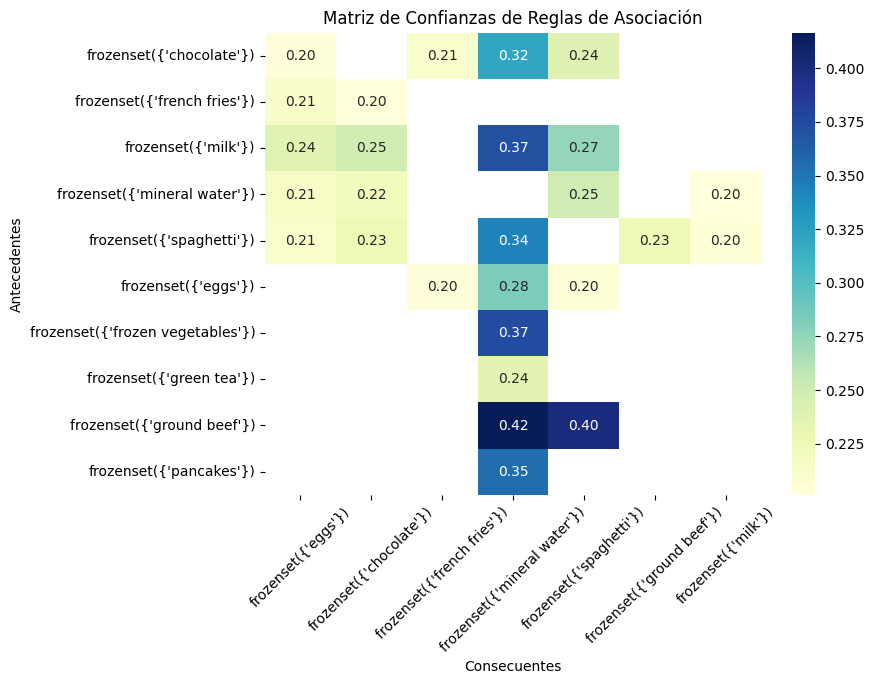

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de confianzas
confianzas_matrix = reglas_filtradas.pivot(index='antecedents', columns='consequents', values='confidence')

# Graficar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confianzas_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Matriz de Confianzas de Reglas de Asociación')
plt.xlabel('Consecuentes')
plt.ylabel('Antecedentes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


h

##**SEGUNDA CONFIGURACION**

a) Utilizando soporte mínimo
*   SOPORTE MÍNIMO: 0.04
*   CONFIANZA: 0.7

b) Utilizando frecuencia soporte
*   FRECUENCIA SOPORTE: 300.04= 0.04*7501
*   CONFIANZA: 0.7

c) Utilizando un antecedente

In [ ]:


# Calcular itemsets frecuentes
itemsets_frecuentes = apriori(df_encoded, min_support=0.04, use_colnames=True)

# Filtrar itemsets frecuentes por longitud
itemsets_frecuentes = itemsets_frecuentes[itemsets_frecuentes['itemsets'].apply(len) > 0]

# Imprimir itemsets frecuentes
print("\nItemsets Frecuentes:\n", itemsets_frecuentes)





Itemsets Frecuentes:
      support                      itemsets
0   0.087188                     (burgers)
1   0.081056                        (cake)
2   0.046794                   (champagne)
3   0.059992                     (chicken)
4   0.163845                   (chocolate)
5   0.080389                     (cookies)
6   0.051060                 (cooking oil)
7   0.179709                        (eggs)
8   0.079323                    (escalope)
9   0.170911                (french fries)
10  0.043061                 (fresh bread)
11  0.063325             (frozen smoothie)
12  0.095321           (frozen vegetables)
13  0.052393               (grated cheese)
14  0.132116                   (green tea)
15  0.098254                 (ground beef)
16  0.049460               (herb & pepper)
17  0.047460                       (honey)
18  0.076523              (low fat yogurt)
19  0.129583                        (milk)
20  0.238368               (mineral water)
21  0.065858                   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Supongamos que ya tenemos itemsets_frecuentes generado mediante apriori

# Calcular reglas de asociación
reglas_asociacion = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.2)

# Obtener el tamaño del último item
tamano_ultimo_item = max(itemsets_frecuentes['itemsets'].apply(len))

# Filtrar reglas de asociación por tamaño del último item
reglas_filtradas = reglas_asociacion[(reglas_asociacion['antecedents'].apply(len) + reglas_asociacion['consequents'].apply(len)) == tamano_ultimo_item]

# Imprimir las reglas de asociación filtradas por tamaño
if not reglas_filtradas.empty:
    print(f"\nReglas de Asociación:")
    for index, row in reglas_filtradas.iterrows():
        antecedente = set(row['antecedents'])
        consecuente = set(row['consequents'])
        confianza = row['confidence']
        print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")
else:
    print(f"\nNo se encontraron reglas de asociación")
print("\n\n")


Reglas de Asociación:
{'mineral water'} -> {'chocolate'} : Confianza = 0.220917225950783
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099
{'mineral water'} -> {'eggs'} : Confianza = 0.21364653243847875
{'eggs'} -> {'mineral water'} : Confianza = 0.28338278931750743
{'ground beef'} -> {'mineral water'} : Confianza = 0.41655359565807326
{'mineral water'} -> {'milk'} : Confianza = 0.20134228187919462
{'milk'} -> {'mineral water'} : Confianza = 0.3703703703703704
{'mineral water'} -> {'spaghetti'} : Confianza = 0.2505592841163311
{'spaghetti'} -> {'mineral water'} : Confianza = 0.3430321592649311





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Las reglas de asociación generadas por Apriori consisten en dos partes clave: el antecedente (premisa) y el consecuente (conclusión). Por ejemplo, una regla podría ser: "Si un cliente compra leche (antecedente), entonces es probable que también compre pan (consecuente)". La medida de soporte indica la frecuencia con la que aparece la combinación de productos en la base de datos, mientras que la confianza mide la probabilidad de que el consecuente ocurra dado el antecedente.

###b)Utilizando frecuencia soporte

In [ ]:
# Calcular la frecuencia de cada item en las transacciones
frecuencias_items = pd.Series(transactions.explode()).value_counts()

# Filtrar items con frecuencia mayor a nuestra frecuecia soporte:
frecuencia_soporte = 300.04
items_frecuentes = frecuencias_items[frecuencias_items >= frecuencia_soporte].index.tolist()

# Filtrar las transacciones para incluir solo items frecuentes
transactions_frecuentes = transactions.apply(lambda x: list(set(x) & set(items_frecuentes)))

# Inicializar y ajustar el codificador de transacciones
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions_frecuentes)

# Convertir los datos codificados en un DataFrame
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Calcular itemsets frecuentes basados en frecuencias
itemsets_frecuentes = apriori(df_encoded, min_support=frecuencia_soporte/len(transactions_frecuentes), use_colnames=True)

# Filtrar itemsets frecuentes por longitud
itemsets_frecuentes = itemsets_frecuentes[itemsets_frecuentes['itemsets'].apply(len) > 0]

# Imprimir itemsets frecuentes con frecuencia en lugar de soporte
itemsets_frecuentes['frecuencia'] = itemsets_frecuentes['support'] * len(transactions_frecuentes)
print("\nItemsets Frecuentes (basados en frecuencias):\n", itemsets_frecuentes[['frecuencia', 'itemsets']])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Itemsets Frecuentes (basados en frecuencias):
     frecuencia                      itemsets
0        654.0                     (burgers)
1        608.0                        (cake)
2        351.0                   (champagne)
3        450.0                     (chicken)
4       1229.0                   (chocolate)
5        603.0                     (cookies)
6        383.0                 (cooking oil)
7       1348.0                        (eggs)
8        595.0                    (escalope)
9       1282.0                (french fries)
10       323.0                 (fresh bread)
11       475.0             (frozen smoothie)
12       715.0           (frozen vegetables)
13       393.0               (grated cheese)
14       991.0                   (green tea)
15       737.0                 (ground beef)
16       371.0               (herb & pepper)
17       356.0                       (honey)
18       574.0              (low fat yogurt)
19       972.0                        (milk)
20     

In [ ]:
# Calcular reglas de asociación con min_confidence 0.2 basado en frecuencias
reglas_asociacion = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.2)

# Obtener el tamaño del último item
tamano_ultimo_item = max(itemsets_frecuentes['itemsets'].apply(len))

# Filtrar reglas de asociación por tamaño del último item
reglas_filtradas = reglas_asociacion[(reglas_asociacion['antecedents'].apply(len) + reglas_asociacion['consequents'].apply(len)) == tamano_ultimo_item]

# Imprimir las reglas de asociación filtradas por tamaño
if not reglas_filtradas.empty:
    print(f"\nReglas de Asociación de Tamaño {tamano_ultimo_item} (basadas en frecuencias):")
    for index, row in reglas_filtradas.iterrows():
        antecedente = set(row['antecedents'])
        consecuente = set(row['consequents'])
        confianza = row['confidence']
        print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")
else:
    print(f"\nNo se encontraron reglas de asociación basadas en frecuencias.")

print("\n\n")


Reglas de Asociación de Tamaño 2 (basadas en frecuencias):
{'mineral water'} -> {'chocolate'} : Confianza = 0.220917225950783
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099
{'mineral water'} -> {'eggs'} : Confianza = 0.21364653243847875
{'eggs'} -> {'mineral water'} : Confianza = 0.28338278931750743
{'ground beef'} -> {'mineral water'} : Confianza = 0.41655359565807326
{'mineral water'} -> {'milk'} : Confianza = 0.20134228187919462
{'milk'} -> {'mineral water'} : Confianza = 0.3703703703703704
{'mineral water'} -> {'spaghetti'} : Confianza = 0.2505592841163311
{'spaghetti'} -> {'mineral water'} : Confianza = 0.3430321592649311





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


El soporte mínimo representa la frecuencia mínima con la que un conjunto de elementos debe aparecer en el conjunto de datos para ser considerado "frecuente". Cuando aumentamos el soporte mínimo, estamos exigiendo que los conjuntos de elementos sean más frecuentes para ser incluidos en las reglas de asociación.
Al cambiar el umbral de soporte mínimo de 0.03 a 0.04 y manteniendo constante la confianza 0,2 estamos siendo más estrictos en cuanto a qué conjuntos de elementos son considerados frecuentes.

En consecuencia, observamos una reducción en el número de reglas de asociación generadas, ya que algunos conjuntos que eran frecuentes bajo el umbral anterior ahora no cumplen con el umbral más alto.
Este ajuste en el umbral de soporte influye en la cantidad y la fuerza de las reglas generadas. Un umbral más alto puede ofrecer reglas más fuertes pero menos en número, mientras que un umbral más bajo podría generar más reglas, aunque algunas podrían ser menos significativas

###Representación gráfica

Gráfico de Red:
 En este gráfico, los nodos pueden representar elementos (antecedentes o consecuentes), y las aristas conectan las reglas. En las aristas se indica el nivel de  confianza.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


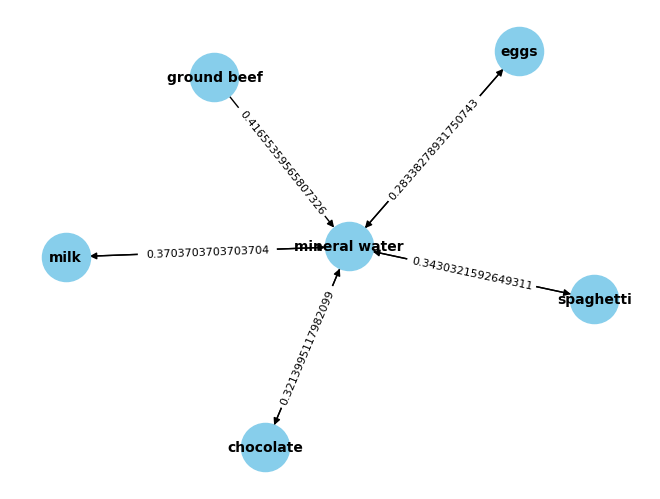

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos un gráfico dirigido
G = nx.DiGraph()

# Agregamos nodos y aristas
for _, row in reglas_filtradas.iterrows():
    antecedente = ', '.join(row['antecedents'])
    consecuente = ', '.join(row['consequents'])
    G.add_edge(antecedente, consecuente, weight=row['confidence'])

# Dibujamos el gráfico
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='skyblue', font_size=10)

# Obtener solo las etiquetas de las aristas que van de antecedente a consecuente
edge_labels = {(source, target): data['weight'] for source, target, data in G.edges(data=True) if data['weight'] > 0}

# Dibujar las etiquetas de las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)

plt.show()






Apreciamos en el gráfico que para este nivel de confianza, la mayor parde de nuestras reglas de asociación van en ambos sentidos, es decir, independientemente de saber el antecedente y el consecuente, ambos productos tienden a comprarse juntos.

##c) Utilizando un antecedente

In [ ]:
def obtener_reglas_por_antecedente(reglas, antecedente):
    reglas_antecedente = []
    for index, row in reglas.iterrows():
        if antecedente in row['antecedents']:
            reglas_antecedente.append(row)
    return reglas_antecedente

antecedente_deseado = 'chocolate'
reglas_chocolate = obtener_reglas_por_antecedente(reglas_filtradas, antecedente_deseado)
print(f"Reglas que contienen el antecedente '{antecedente_deseado}':")
for regla in reglas_chocolate:
    antecedente = set(regla['antecedents'])
    consecuente = set(regla['consequents'])
    confianza = regla['confidence']
    print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")

Reglas que contienen el antecedente 'chocolate':
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


## **TERCERA CONFIGURACION**


a) Utilizando soporte mínimo
*   SOPORTE MÍNIMO:0.05
*   CONFIANZA: 0.4

b) Utilizando frecuencia soporte
*   FRECUENCIA SOPORTE:375.05= 0.05*7501
*   CONFIANZA: 0.4

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# Cargar los datos
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', sep=';', header=None)

# Convertir la columna en una lista de listas
transactions = data[0].str.split(',')

# Inicializar y ajustar el codificador de transacciones
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)

# Convertir los datos codificados en un DataFrame
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Calcular itemsets frecuentes
itemsets_frecuentes = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Filtrar itemsets frecuentes por longitud
itemsets_frecuentes = itemsets_frecuentes[itemsets_frecuentes['itemsets'].apply(len) > 0]

# Imprimir itemsets frecuentes
print("\nItemsets Frecuentes:\n", itemsets_frecuentes)




Itemsets Frecuentes:
      support                    itemsets
0   0.087188                   (burgers)
1   0.081056                      (cake)
2   0.059992                   (chicken)
3   0.163845                 (chocolate)
4   0.080389                   (cookies)
5   0.051060               (cooking oil)
6   0.179709                      (eggs)
7   0.079323                  (escalope)
8   0.170911              (french fries)
9   0.063325           (frozen smoothie)
10  0.095321         (frozen vegetables)
11  0.052393             (grated cheese)
12  0.132116                 (green tea)
13  0.098254               (ground beef)
14  0.076523            (low fat yogurt)
15  0.129583                      (milk)
16  0.238368             (mineral water)
17  0.065858                 (olive oil)
18  0.095054                  (pancakes)
19  0.071457                    (shrimp)
20  0.050527                      (soup)
21  0.174110                 (spaghetti)
22  0.068391                  (tom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


# Calcular reglas de asociación
reglas_asociacion = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.3)

# Obtener el tamaño del último item
tamano_ultimo_item = max(itemsets_frecuentes['itemsets'].apply(len))

# Filtrar reglas de asociación por tamaño del último item
reglas_filtradas = reglas_asociacion[(reglas_asociacion['antecedents'].apply(len) + reglas_asociacion['consequents'].apply(len)) == tamano_ultimo_item]

# Imprimir las reglas de asociación filtradas por tamaño
if not reglas_filtradas.empty:
    print(f"\nReglas de Asociación:")
    for index, row in reglas_filtradas.iterrows():
        antecedente = set(row['antecedents'])
        consecuente = set(row['consequents'])
        confianza = row['confidence']
        print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")
else:
    print(f"\nNo se encontraron reglas de asociación")
print("\n\n")



Reglas de Asociación:
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099
{'spaghetti'} -> {'mineral water'} : Confianza = 0.3430321592649311





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


### b)Utilizando frecuencia soporte

In [ ]:
# Calcular la frecuencia de cada item en las transacciones
frecuencias_items = pd.Series(transactions.explode()).value_counts()

# Filtrar items con frecuencia mayor anuestra frecuecnia soporte:
frecuencia_soporte = 375.05
items_frecuentes = frecuencias_items[frecuencias_items >= frecuencia_soporte].index.tolist()

# Filtrar las transacciones para incluir solo items frecuentes
transactions_frecuentes = transactions.apply(lambda x: list(set(x) & set(items_frecuentes)))

# Inicializar y ajustar el codificador de transacciones
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions_frecuentes)

# Convertir los datos codificados en un DataFrame
df_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Calcular itemsets frecuentes basados en frecuencias
itemsets_frecuentes = apriori(df_encoded, min_support=frecuencia_soporte/len(transactions_frecuentes), use_colnames=True)

# Filtrar itemsets frecuentes por longitud
itemsets_frecuentes = itemsets_frecuentes[itemsets_frecuentes['itemsets'].apply(len) > 0]

# Imprimir itemsets frecuentes con frecuencia en lugar de soporte
itemsets_frecuentes['frecuencia'] = itemsets_frecuentes['support'] * len(transactions_frecuentes)
print("\nItemsets Frecuentes (basados en frecuencias):\n", itemsets_frecuentes[['frecuencia', 'itemsets']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Itemsets Frecuentes (basados en frecuencias):
     frecuencia                    itemsets
0        654.0                   (burgers)
1        608.0                      (cake)
2        450.0                   (chicken)
3       1229.0                 (chocolate)
4        603.0                   (cookies)
5        383.0               (cooking oil)
6       1348.0                      (eggs)
7        595.0                  (escalope)
8       1282.0              (french fries)
9        475.0           (frozen smoothie)
10       715.0         (frozen vegetables)
11       393.0             (grated cheese)
12       991.0                 (green tea)
13       737.0               (ground beef)
14       574.0            (low fat yogurt)
15       972.0                      (milk)
16      1788.0             (mineral water)
17       494.0                 (olive oil)
18       713.0                  (pancakes)
19       536.0                    (shrimp)
20       379.0                      (soup)
21    

In [ ]:
# Calcular reglas de asociación con min_confidence 0.4 basado en frecuencias
reglas_asociacion = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.3)

# Obtener el tamaño del último item
tamano_ultimo_item = max(itemsets_frecuentes['itemsets'].apply(len))

# Filtrar reglas de asociación por tamaño del último item
reglas_filtradas = reglas_asociacion[(reglas_asociacion['antecedents'].apply(len) + reglas_asociacion['consequents'].apply(len)) == tamano_ultimo_item]

# Imprimir las reglas de asociación filtradas por tamaño
if not reglas_filtradas.empty:
    print(f"\nReglas de Asociación de Tamaño {tamano_ultimo_item} (basadas en frecuencias):")
    for index, row in reglas_filtradas.iterrows():
        antecedente = set(row['antecedents'])
        consecuente = set(row['consequents'])
        confianza = row['confidence']
        print(f"{antecedente} -> {consecuente} : Confianza = {confianza}")
else:
    print(f"\nNo se encontraron reglas de asociación basadas en frecuencias.")

print("\n\n")



Reglas de Asociación de Tamaño 2 (basadas en frecuencias):
{'chocolate'} -> {'mineral water'} : Confianza = 0.3213995117982099
{'spaghetti'} -> {'mineral water'} : Confianza = 0.3430321592649311





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Estas reglas sugieren que hay una probabilidad del 32% al 34% de que los clientes que compran chocolate también compren agua mineral, y un 34% de probabilidad de que los clientes que compran espaguetis también adquieran agua mineral. Aunque no es una confianza muy alta, en el contexto de nuestra base de datos analizada, un valor del 32% lo consideramos significativo, especialmente cuando se ajusta el umbral  más estricto (0.3) que hemos utilizado.

Estas asociaciones pueden ser útiles para estrategias de colocación de productos  ya que nos dicen que productos tienen más tendencia a comprarse juntos. Podríamos considerar colocar chocolate cerca del agua mineral en el supermercado para fomentar compras conjuntas.

Las reglas también ofrecen información sobre los hábitos de compra de los clientes. Conocer estas asociaciones puede ayudar en la planificación de inventario y de nuevo a saber que productos tienden a comprarse de manera conjunta.

Además podría ser útil en campañas de marketing en supermercados, diseñando ofertas especiales o descuentos para incentivar la compra conjunta de chocolate y agua mineral.

###Representación gráfica

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


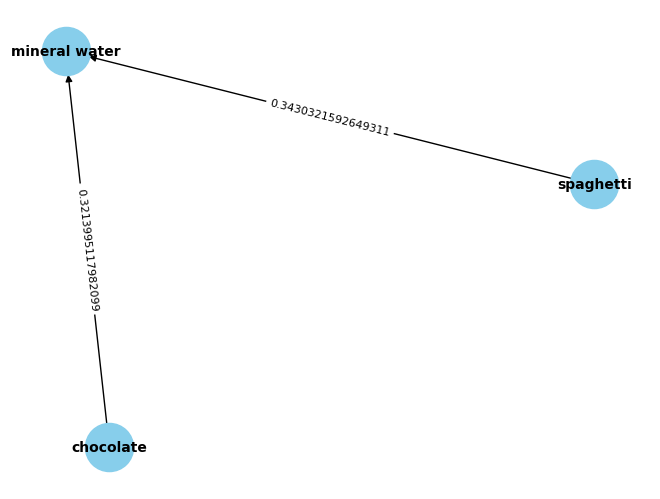

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos un gráfico dirigido
G = nx.DiGraph()

# Agregamos nodos y aristas
for _, row in reglas_filtradas.iterrows():
    antecedente = ', '.join(row['antecedents'])
    consecuente = ', '.join(row['consequents'])
    G.add_edge(antecedente, consecuente, weight=row['confidence'])

# Dibujamos el gráfico
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='skyblue', font_size=10)

# Obtener solo las etiquetas de las aristas que van de antecedente a consecuente
edge_labels = {(source, target): data['weight'] for source, target, data in G.edges(data=True) if data['weight'] > 0}

# Dibujar las etiquetas de las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)

plt.show()



En el gráfico vemos representado como el agua mineral es el producto más significativo del supermercado, ya que está incluido en todas las reglas de asociación más estrictas que encontramos.